In [1]:
from pathlib import Path
from pprint import pprint
from typing import List, Tuple
import pickle

import matplotlib.pyplot as plt

from pos import evaluate
from pos import data

EXPERIMENT_DIR=Path(".")/"out"

## Read the experiment files
Here are some useful functions for gathering experimental data and doing averages across folds.

In [2]:
def gather_experiments(experiment_paths):
    return [
        evaluate.Experiment.from_file(experiment_path) for experiment_path in experiment_paths
    ]

# TODO update
def pretty_print_average_experiments(name: str, results: List[Tuple[float, int]]) -> str:
    """Return a nicely formatted aggregate of a collection of experiments."""
    names = ["tot", "unk", "kno", "mor", "wmb", "pre", "chr"]
    print(f"{name:<15}: ", end="")
    for result, name in zip(results, names):
        print(f"{format_acc_total(name, *result)}", end="")
    print()

def format_acc_total(name: str, acc: float, total: int) -> str:
    """Format accuracy and total incorrect."""
    return f"{name:<5}={acc*100:>02.2f}% / {total:>4d} "


def create_pie_chart(name: str, results: List[Tuple[float, int]]):
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    total, unknown, known, rest = results[0], results[1], results[2], results[3:]
    labels = ["k-wemb", "k-wemb+m", "k-m", "seen", "u-wemb", "u-wemb+m", "u-m", "unseen"]
    labels = [f"{name}={acc*100:>02.2f}% / {total}" for name, (acc, total) in zip(labels, rest) if total > 0]
    sizes = [total for _, total in rest if total > 0]

    fig = plt.figure(figsize=(6,8))
    ax = fig.add_subplot(111)
    patches, _ = ax.pie(sizes, labels=labels, startangle=90)
    ax.axis('equal')
    ax.set_title(label=f"""{name}
Total={total[0]*100:>02.2f}% / {total[1]}
Unknown={unknown[0]*100:>02.2f}% / {unknown[1]}
Known={known[0]*100:>02.2f}% / {known[1]}""", loc='left')
    ax.legend(patches, labels, loc='upper right', bbox_to_anchor=(1.1, 1.05))
    return fig

### Folds

In [17]:
fold_experiments = {
    "base": gather_experiments(EXPERIMENT_DIR / "gold-baseline" / f"{i:02}" for i in range(1, 10)),
    "freeze": gather_experiments(EXPERIMENT_DIR / "gold-baseline+freeze" / f"{i:02}" for i in range(1, 10)),
    "pretr": gather_experiments(EXPERIMENT_DIR / "gold-baseline-pretrained" / f"{i:02}" for i in range(1, 10)),
    "freeze+pretrained": gather_experiments(EXPERIMENT_DIR / "gold-baseline+freeze+pretrained" / f"{i:02}" for i in range(1, 10)),
}

In [18]:
averages = [(name, evaluate.all_accuracy_average(experiments)) for name, experiments in fold_experiments.items()]
    

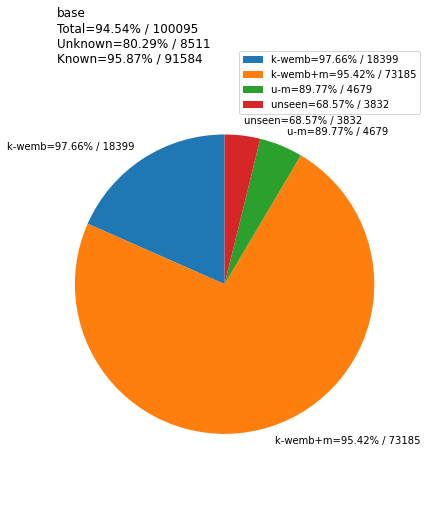

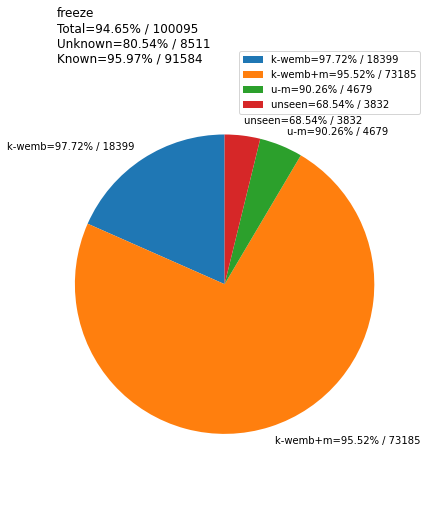

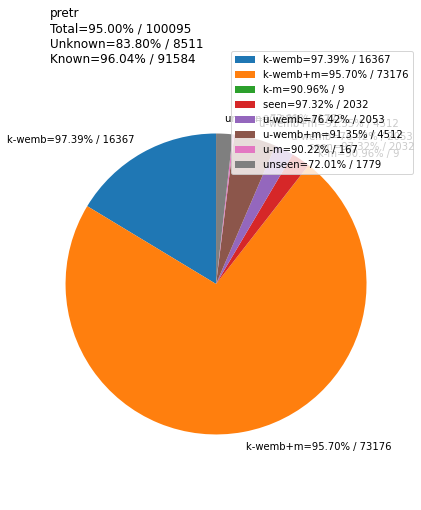

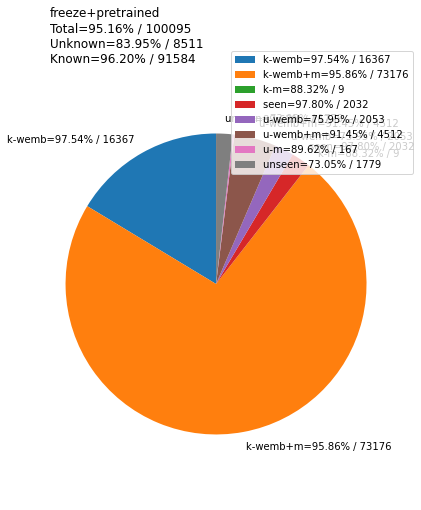

In [19]:
for name, average in averages:
    create_pie_chart(name, average).show()

In [6]:
for name, average in averages:
    pretty_print_average_experiments(name, average)

NameError: name 'averages' is not defined

## Individual experiments
Define individual experiments and do analysis.


In [7]:
#baseline = "abl-tagger-baseline"
experiment_names = [
    #baseline,
    EXPERIMENT_DIR / "test",
]
experiments = gather_experiments(experiment_names)

FileNotFoundError: [Errno 2] No such file or directory: 'out/test/predictions.tsv'

In [8]:
for experiment in experiments:
    print(experiment)


NameError: name 'experiments' is not defined

In [9]:
print(len(experiments[0].wemb_vocab()))
print(len(experiments[0].morphlex_vocab()))
print(len(experiments[0].morphlex_vocab().difference(experiments[0].wemb_vocab())))
print(len(experiments[0].wemb_vocab().difference(experiments[0].morphlex_vocab())))

NameError: name 'experiments' is not defined

### Errors
Proposed tag -> gold tag

In [10]:
print_errors(experiments)


NameError: name 'print_errors' is not defined

In [11]:
def get_error_diff(baseline, compare_to):
    result = {}
    for key, value in baseline.items():
        if key not in compare_to:
            result[key] = basline[key]
            continue
        diff = baseline[key] - compare_to[key]
        if diff != 0:
            result[key] = diff
    return result

            

In [12]:
from collections import Counter
c_1 = Counter((1, 1, 2))
c_2 = Counter((1, 1, 3))
print(c_1 - c_2)

Counter({2: 1})


In [13]:
baseline = "sgd+morph_lex-freeze+wemb-pretrained-300-reduced-lr"
baseline_errors = evaluate.all_errors(experiments[baseline]["examples"])
for experiment_name in experiments:
    if experiment_name == baseline:
        continue
    print(f"{experiment_name}: First, in basline not in {experiment_name}, then in {experiment_name} not in basline.")
    pprint((evaluate.all_errors(experiments[baseline]["examples"]) - evaluate.all_errors(experiments[experiment_name]["examples"])).most_common(20))
    pprint((evaluate.all_errors(experiments[experiment_name]["examples"]) - evaluate.all_errors(experiments[baseline]["examples"])).most_common(20))

AttributeError: module 'pos.evaluate' has no attribute 'all_errors'